In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [141]:
data = pd.read_csv("./Default.csv")
print(data.shape)
data.head()


(10000, 5)


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [6]:
b = data[data.default=="No"].sample(frac=0.1)
r = data[data.default=="Yes"]


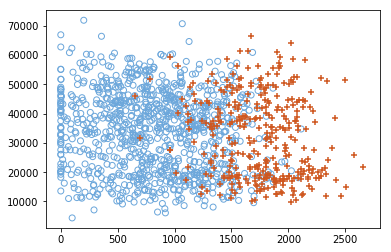

In [66]:
plt.scatter(b.balance,b.income,facecolors='none',edgecolors='#6CA7DB')
plt.scatter(r.balance,r.income,c='#CF571F',marker='+')

/home/mauro/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0,0.5,'Income')

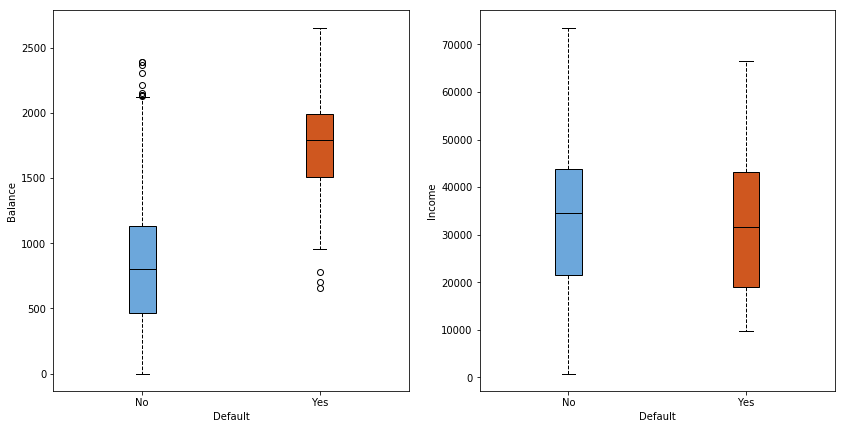

In [67]:

labels = ['No','Yes']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

medianlineprops = dict( color='black')
whiskerprops = dict(linestyle = '--')

# rectangular box plot
bplot1 = axes[0].boxplot([ data[data.default=="No"].balance,r.balance],
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         medianprops=medianlineprops,
                         whiskerprops= whiskerprops,
                         labels=labels)  # will be used to label x-ticks
# axes[0].set_title('Rectangular box plot')

# notch shape box plot
bplot2 = axes[1].boxplot([ data[data.default=="No"].income,r.income],
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         medianprops=medianlineprops,
                         whiskerprops= whiskerprops,
                         labels=labels)  # will be used to label x-ticks
# axes[1].set_title('Notched box plot')

# fill with colors
colors = ['#6CA7DB', '#CF571F']

for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    
    ax.set_xlabel('Default')
#     ax.set_ylabel('Observed values')

axes[0].set_ylabel("Balance")
axes[1].set_ylabel("Income")

In [111]:
x = data.balance
y = data.default
y[y=="Yes"] =1 
y[y=="No"] =0

x = x.reshape(-1,1)
y = y.reshape(-1,1)
y=y.astype('int')
x=x.astype('float')

/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is depr

In [107]:

clf = LogisticRegression()
clf.fit(x, y)


/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

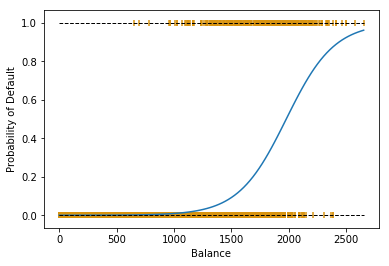

In [136]:
xs = np.linspace(min(x),max(x),100)
ys=clf.predict_proba(xs.reshape(-1,1)) 
plt.scatter(x,y,c='#D99410',marker='|')
plt.plot(xs,ys[:,1])
plt.xlabel("Balance")
plt.ylabel("Probability of Default")
plt.plot([min(xs),max(xs)],[0,0],linestyle="--",c='black',linewidth=1)
plt.plot([min(xs),max(xs)],[1,1],linestyle="--",c='black',linewidth=1)

In [209]:
data['studentBin'] = list(map(lambda x: 1 if x=="Yes" else 0,data['student']))
data.head()


,Unnamed: 0,default,student,balance,income,studentBin
0,1,0,No,729.526495,44361.625074,0
1,2,0,Yes,817.180407,12106.134700,1
2,3,0,No,1073.549164,31767.138947,0
3,4,0,No,529.250605,35704.493935,0
4,5,0,No,785.655883,38463.495879,0


In [198]:
x = data[['balance','studentBin']]
y = data.default
y[y=="Yes"] =1 
y[y=="No"] =0

y = y.reshape(-1,1)
y=y.astype('int')


/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [199]:
x.head()

,balance,studentBin
0,729.526495,0
1,817.180407,1
2,1073.549164,0
3,529.250605,0
4,785.655883,0


In [200]:

clf = LogisticRegression()
clf.fit(x, y)

/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Text(0,0.5,'Probability of Default')

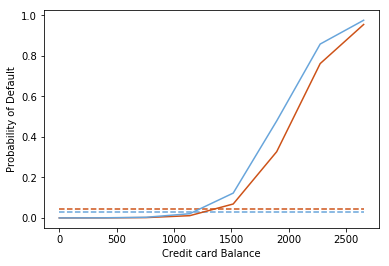

In [220]:
xs = np.linspace(min(x.balance),max(x.balance),8)
stud =  clf.predict_proba(np.array([xs,np.ones(len(xs))  ]).transpose()) 
nstud = clf.predict_proba(np.array([xs,np.ones(len(xs))-1]).transpose()) 
plt.plot(xs,np.ones(len(xs))*np.mean(data[data['studentBin']==1].default),c='#CD5218',linestyle='--')
plt.plot(xs,np.ones(len(xs))*np.mean(data[data['studentBin']==0].default),c='#68A5DB',linestyle='--')
plt.plot(xs,stud[:,1],c='#CD5218',)
plt.plot(xs,nstud[:,1],c='#68A5DB')
plt.xlabel("Credit card Balance")
plt.ylabel("Probability of Default")


/home/mauro/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0,'Student status')

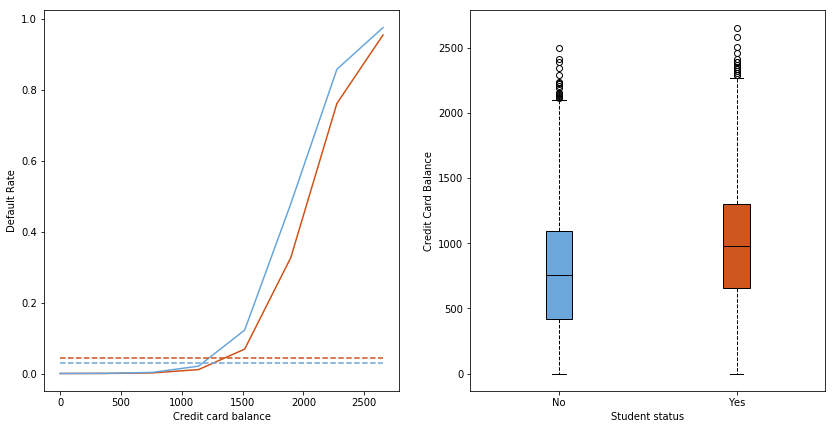

In [229]:

labels = ['No','Yes']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

medianlineprops = dict( color='black')
whiskerprops = dict(linestyle = '--')

# rectangular box plot
bplot1 = axes[0].plot(xs,stud[:,1],c='#CD5218',)
axes[0].plot(xs,nstud[:,1],c='#68A5DB')
axes[0].plot(xs,np.ones(len(xs))*np.mean(data[data['studentBin']==1].default),c='#CD5218',linestyle='--')
axes[0].plot(xs,np.ones(len(xs))*np.mean(data[data['studentBin']==0].default),c='#68A5DB',linestyle='--')

# notch shape box plot
bplot2 = axes[1].boxplot([ data[data.student=="No"].balance,data[data.student=="Yes"].balance],
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         medianprops=medianlineprops,
                         whiskerprops= whiskerprops,
                         labels=labels)  # will be used to label x-ticks
# axes[1].set_title('Notched box plot')

# fill with colors
colors = ['#6CA7DB', '#CF571F']

for bplot in [bplot2]:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines


axes[0].set_ylabel("Default Rate")
axes[1].set_ylabel("Credit Card Balance")


axes[0].set_xlabel("Credit card balance")
axes[1].set_xlabel("Student status")